Cuneyt Erem 3277992 s6curem@uni-bonn.de

Paula Romero Jimenez 3320220 s0parome@uni-bonn.de
 
Nkeh Victor Ndiwago 3504121 s0vinkeh@uni-bonn.de

## Exercise sheet 9

### Exercise 1 - Ensemble Learning (8 points)

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso

**1. Using the titanic_survival_dataset.csv, train the following (scikit-learn) models using nested cross validation while optimizing a selected number of hyperparameters in the inner loop using grid search, then compute the probabilities of the outcomes:**

In [2]:
dataset = pd.read_csv('titanic_survival_data.csv')
dataset

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,no_cabin,Label
0,1,3,0,22.0,1,0,7.2500,0,2,0
1,2,1,1,38.0,1,0,71.2833,1,1,1
2,3,3,1,26.0,0,0,7.9250,0,2,1
3,4,1,1,35.0,1,0,53.1000,0,1,1
4,5,3,0,35.0,0,0,8.0500,0,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,0,2,0
887,888,1,1,19.0,0,0,30.0000,0,1,1
888,889,3,1,24.0,1,2,23.4500,0,2,0
889,890,1,0,26.0,0,0,30.0000,1,1,1


_a. Random forest, optimizing the number of estimators (1 point)_

In [3]:
# Divide the dataframe into target and rest
X = dataset.drop(['Label'], axis=1) 
y = dataset['Label']

# We configure the nested cross-validation procedure: we are going to have a outer loop and a inner loop
# Outer loop: helps us asses the quality of the model
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Inner loop: for model/parameter selection
cv_inner = KFold(n_splits=4, shuffle=True, random_state=1)

# We define the model
model = RandomForestClassifier(random_state=1)

# We define search space: we want to optimize the number of estimators (parameter grid)
space = dict()
space['n_estimators'] = [10, 100, 250, 500]

# Define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)

# We fit the search to be able to find best hyperparameters
result = search.fit(X, y)

# Execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)

# Report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print(f'The best option is using {result.best_params_} with a {result.best_score_} accuracy')

Accuracy: 0.814 (0.031)
The best option is using {'n_estimators': 250} with a 0.8159718013978103 accuracy


In [4]:
# Divide the dataset into 80% training and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Compute the probability of the outcomes
prob1 = result.predict_proba(X_test)
print(prob1[:10])

[[0.028 0.972]
 [0.964 0.036]
 [0.048 0.952]
 [0.692 0.308]
 [0.008 0.992]
 [0.98  0.02 ]
 [0.796 0.204]
 [0.016 0.984]
 [0.916 0.084]
 [0.064 0.936]]


_b.	Gradient boosting, optimizing boosting steps (2 point)_

In [5]:
# Divide the dataframe into target and rest
X = dataset.drop(['Label'], axis=1) 
y = dataset['Label']

# We configure the nested cross-validation procedure: we are going to have a outer loop and a inner loop
# Outer loop: helps us asses the quality of the model
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Inner loop: for model/parameter selection
cv_inner = KFold(n_splits=4, shuffle=True, random_state=1)

# We define the model
model = GradientBoostingClassifier(random_state=1)

# We define search space: we want to optimize the number of estimators (parameter grid)
# N_estimators = the number of boosting stages to perform
space = dict()
space['n_estimators'] = [50, 100, 250, 500]

# Define search
search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)

# We fit the search to be able to find best hyperparameters
result = search.fit(X, y)

# Execute the nested cross-validation
scores = cross_val_score(result, X, y, cv=cv_outer, scoring='accuracy')

# Report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print(f'The best option is using {result.best_params_} with a {result.best_score_} accuracy')

Accuracy: 0.827 (0.033)
The best option is using {'n_estimators': 50} with a 0.8148759746293379 accuracy


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Compute the probability of the outcomes
prob2 = result.predict_proba(X_test)
print(prob2[:10])

[[0.09832013 0.90167987]
 [0.89106083 0.10893917]
 [0.14291704 0.85708296]
 [0.47774111 0.52225889]
 [0.06326413 0.93673587]
 [0.89173272 0.10826728]
 [0.83131371 0.16868629]
 [0.03892631 0.96107369]
 [0.72615598 0.27384402]
 [0.32831925 0.67168075]]


_c.	Lasso penalized logistic regression, optimizing L1 regularization strength (1 point)_

In [7]:
# Divide the dataframe into target and rest
X = dataset.drop(['Label'], axis=1) 
y = dataset['Label']

# We configure the nested cross-validation procedure: we are going to have a outer loop and a inner loop
# Outer loop: helps us asses the quality of the model
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

# Inner loop: for model/parameter selection
cv_inner = KFold(n_splits=4, shuffle=True, random_state=1)

# We define the model
model = Lasso(random_state=1)

# We define search space: we want to optimize the L1 regularization strength, which is alpha
space = dict()
space['alpha'] = [1, 5, 10, 15]

# Define search
search = GridSearchCV(model, space, cv=cv_inner, refit=True)

# We fit the search to be able to find best hyperparameters
result = search.fit(X, y)

# Execute the nested cross-validation
scores = cross_val_score(result, X, y, cv=cv_outer)

# Report performance
print(f'The best option is using {result.best_params_}')

The best option is using {'alpha': 1}


I know we can't use the predict_proba method, instead we should use the CalibratedClassifierCV but I'm not able to implement it.

**2. Inform yourself about calibration curves (reliability diagrams).**

_d.	Describe how calibration curves can explain your model’s performance. 
(1 point)_

Calibration curves or reliability diagrams compare the calibration of classifier's probabilities.

We usually used accuracy to measure a model's performance, however a model should also be well-calibrated. 

This calibration plot is going to show the relation between the true class of the samples and the predicted probabilities. Therefore, this will give us a measure of how realistic a model prediction is.

_e.	Use the predicted probabilities of each model from question 1 to plot a calibration curve, then explain your results. (3 points)_

In [8]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

rf_y, rf_x = calibration_curve(y_test, prob1[:,1], n_bins=10)
gb_y, gb_x = calibration_curve(y_test, prob2[:,1], n_bins=10)


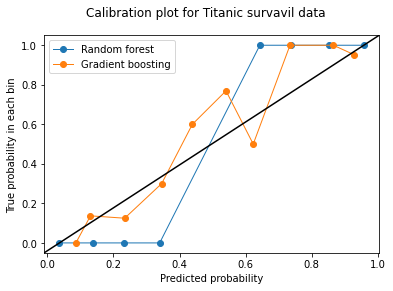

In [9]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(rf_x,rf_y, marker='o', linewidth=1, label='Random forest')
plt.plot(gb_x, gb_y, marker='o', linewidth=1, label='Gradient boosting')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Titanic survavil data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

We could say the model trained with Gradient Boosting is performing best than Random Forest.  Nevertheless, it is not a great perfomance either.

____

exercise2)

1. Suppose there is a Multi-Layer Perceptron (MLP) composed of one input layer
with 8 neurons, followed by one hidden layer with 30 artificial neurons, and one
output layer with 3 artificial neurons. All artificial neurons use the ReLU activation
function.

a. Deduce the shape of input matrix X, hidden layer’s weight vector Wh, bias
vector bh and the shape of the network’s output matrix Y. (2 points)

 shape of input matrix X=number of neurones  * batch size                      
                       X= 8*batch size

Hidden layer's weight vector Wh = 240

Hidden layer's bias vector bh= 30

shape of the network's output matrix Y = batch size * number of neurones in output layer                     

b. Write the equation that computes the network’s output matrix Y as a function of X, Wh , bh , Wo and bo. (2 points)

Y=(bo+Wo)*(bh+whX)

Y=93*(30+1920*batch size)

2.What are the principal and unavoidable limitations of the backpropagation (BP)? (1 point)

-It relies on input to perform on a specific problem

-It is sensitive to complex/ noisy data

-It needs the derivatives of activation functions for the network design time.


-------------------------------

3-4) Compute h1, h2, o1, and total error using ReLU units. (2 points)

In [10]:
from sklearn.metrics import mean_squared_error

def relu(x):
    return max(0.0, x)

i1, i2 = 0.9, 0.3
w1, w2, w3, w4, w5, w6 = -0.2, 0.35, 0.12, 0.8, 0.45, 0.5
b1, b2, b3 = 0.15, -0.2, 0.5

h1_prev = w1*i1 + w2*i2 + b1
h2_prev = w3*i1 + w4*i2 + b2
h1_net = relu(h1_prev)
h2_net = relu(h2_prev)
o1 = w5*h1_net + w6*h2_net + b3
total_error = mean_squared_error([1], [o1])

print("h1: ", h1_net)
print("h2: ", h2_net)
print("o1: ", o1)
print("total_error: ", total_error)

h1:  0.07499999999999997
h2:  0.14799999999999996
o1:  0.60775
total_error:  0.15386006249999998


5) Calculate the updates of the network weights w1, …, w6 and bias terms b1, b2, b3 using backpropagation. Assume a learning rate of 1 for the sake of simplicity. (3 points).

derivative of relu is defined as;

$f(x) = 1$ if $x > 0$
$f(x) = 0$ if $x <= 0$

$\frac{\partial L}{\partial o} = -2*(1 - o1)$

In [11]:
par_L_over_w6 = -2*(1 - o1)*1*h2_prev
par_L_over_w6

-0.11610599999999997

$\frac{\partial L}{\partial w6} = \frac{\partial L}{\partial o1} * \frac{\partial o1}{\partial w6} = -2*(1 - o1)*relu'(h1)*h2 = -0.1161$

In [12]:
par_L_over_w5 = -2*(1 - o1)*1*h1_prev
par_L_over_w5

-0.05883749999999997

$\frac{\partial L}{\partial w5} = \frac{\partial L}{\partial o1} * \frac{\partial o1}{\partial w5} = -2*(1 - o1)*relu'(h1)*h1 = -0.0588$

In [13]:
par_L_over_b3 = -2*(1 - o1)*1
par_L_over_b3

-0.7845

$\frac{\partial L}{\partial b3} = \frac{\partial L}{\partial o1} * \frac{\partial o1}{\partial b3} = -2*(1 - o1)*b3 = -0.7845$

In [14]:
par_L_over_w1 = -2*(1 - o1)*1*w5*i1
par_L_over_w1

-0.31772249999999996

$\frac{\partial L}{\partial w1} = \frac{\partial L}{\partial o1} * \frac{\partial o1}{\partial h1} * \frac{\partial h1}{\partial w1} = -2*(1 - o1)*w5*relu'(h1)*i1 = -0.3177$

In [15]:
par_L_over_w2 = -2*(1 - o1)*1*w5*i2
par_L_over_w2

-0.10590749999999999

$\frac{\partial L}{\partial w2} = \frac{\partial L}{\partial o1} * \frac{\partial o1}{\partial h1} * \frac{\partial h1}{\partial w2} = -2*(1 - o1)*w5*relu'(h1)*i2 = -0.1059$

In [16]:
par_L_over_w3 = -2*(1 - o1)*1*w6*i1
par_L_over_w3

-0.353025

$\frac{\partial L}{\partial w3} = \frac{\partial L}{\partial o1} * \frac{\partial o1}{\partial h1} * \frac{\partial h1}{\partial w3} = -2*(1 - o1)*w6*relu'(h1)*i1 = -0.3530$

In [17]:
par_L_over_w4 = -2*(1 - o1)*1*w6*i2
par_L_over_w4

-0.11767499999999999

$\frac{\partial L}{\partial w4} = \frac{\partial L}{\partial o1} * \frac{\partial o1}{\partial h1} * \frac{\partial h1}{\partial w4} = -2*(1 - o1)*w6*relu'(h1)*i2 = -0.1176$

In [18]:
par_L_over_b2 = -2*(1 - o1)*1*w6
par_L_over_b2

-0.39225

$\frac{\partial L}{\partial b2} = \frac{\partial L}{\partial o1} * \frac{\partial o1}{\partial b2} = -2*(1 - o1)*w6*relu'(h1) = -0.3922$

In [19]:
par_L_over_b1 = -2*(1 - o1)*1*w5
par_L_over_b1

-0.353025

$\frac{\partial L}{\partial b1} = \frac{\partial L}{\partial o1} * \frac{\partial o1}{\partial b1} = -2*(1 - o1)*w5*relu'(h1) = -0.3530$

---------------------------